In [469]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import os
from pathlib import Path
import hvplot.pandas
from matplotlib import pyplot as plt
from datetime import datetime

%matplotlib inline

In [470]:
# Reading Data

clothing_Access_path = Path("../data/rawdata/Clothing_ Access _Stores_Total.csv")
department_Stores_path = Path("../data/rawdata/Department_Stores_Total.csv")          
electronics_Appli_path = Path("../data/rawdata/Electronics_Appli_Stores_Total.csv")
Food_Serv_Drink_path = Path("../data/rawdata/Food _Serv_ Drink _Places_Total.csv")
Food_Beverage_path = Path("../data/rawdata/Food_Beverage_Stores_Total.csv")
Furniture_HomeFurnis_path = Path("../data/rawdata/Furnitures_HomeFurnis_Total.csv")
Health_Personal_Care_path = Path("../data/rawdata/Health_Personal_Care_Total.csv")
Nonstore_Retailers_path = Path("../data/rawdata/Nonstore _Retailers_Total.csv")

clothing_Access = pd.read_csv(clothing_Access_path, index_col="Period", infer_datetime_format=True, parse_dates=True)
department_Stores = pd.read_csv(department_Stores_path, index_col="Period", infer_datetime_format=True, parse_dates=True)
electronics_Appli = pd.read_csv(electronics_Appli_path, index_col="Period", infer_datetime_format=True, parse_dates=True)
food_Serv_Drink = pd.read_csv(Food_Serv_Drink_path, index_col="Period", infer_datetime_format=True, parse_dates=True)
food_Beverage = pd.read_csv(Food_Beverage_path, index_col="Period", infer_datetime_format=True, parse_dates=True)
furniture_HomeFurnis = pd.read_csv(Furniture_HomeFurnis_path, index_col="Period", infer_datetime_format=True, parse_dates=True)
health_Personal_Care = pd.read_csv(Health_Personal_Care_path, index_col="Period", infer_datetime_format=True, parse_dates=True)
nonstore_Retailers = pd.read_csv(Nonstore_Retailers_path, index_col="Period", infer_datetime_format=True, parse_dates=True)

In [471]:
retail_combined_df = pd.concat([clothing_Access, department_Stores, electronics_Appli, food_Serv_Drink, food_Beverage, furniture_HomeFurnis, health_Personal_Care], axis="columns", join="inner")
retail_combined_df.head()

,Value,Value,Value,Value,Value,Value,Value
Period,,,,,,,
18-Jan,15780.0,9120.0,7290.0,54478.0,60393.0,8878.0,27699.0
18-Feb,18424.0,9663.0,6972.0,54702.0,56483.0,8701.0,25667.0
18-Mar,22207.0,11481.0,7581.0,63389.0,63791.0,10185.0,28477.0
18-Apr,20463.0,10567.0,6835.0,60128.0,59571.0,9365.0,27155.0
18-May,23560.0,12014.0,7397.0,63941.0,64527.0,10114.0,28960.0


In [472]:
retail_combined_df.columns=["clothing", "department_Stores","electronics_Appli", "food_Serv_Drink", "food_Beverage", "furniture_HomeFurnis", "health_Personal_Care"]

In [473]:
retail_combined_df.head()

,clothing,department_Stores,electronics_Appli,food_Serv_Drink,food_Beverage,furniture_HomeFurnis,health_Personal_Care
Period,,,,,,,
18-Jan,15780.0,9120.0,7290.0,54478.0,60393.0,8878.0,27699.0
18-Feb,18424.0,9663.0,6972.0,54702.0,56483.0,8701.0,25667.0
18-Mar,22207.0,11481.0,7581.0,63389.0,63791.0,10185.0,28477.0
18-Apr,20463.0,10567.0,6835.0,60128.0,59571.0,9365.0,27155.0
18-May,23560.0,12014.0,7397.0,63941.0,64527.0,10114.0,28960.0


In [474]:
retail_combined_df.isnull().sum()

clothing                9
department_Stores       9
electronics_Appli       9
food_Serv_Drink         9
food_Beverage           9
furniture_HomeFurnis    9
health_Personal_Care    9
dtype: int64

In [475]:
retail_combined_df.dropna(inplace = True)
retail_combined_df.head()



,clothing,department_Stores,electronics_Appli,food_Serv_Drink,food_Beverage,furniture_HomeFurnis,health_Personal_Care
Period,,,,,,,
18-Jan,15780.0,9120.0,7290.0,54478.0,60393.0,8878.0,27699.0
18-Feb,18424.0,9663.0,6972.0,54702.0,56483.0,8701.0,25667.0
18-Mar,22207.0,11481.0,7581.0,63389.0,63791.0,10185.0,28477.0
18-Apr,20463.0,10567.0,6835.0,60128.0,59571.0,9365.0,27155.0
18-May,23560.0,12014.0,7397.0,63941.0,64527.0,10114.0,28960.0


In [477]:
retail_combined_df.to_csv('../data/cleandata/retail_combined_df.csv')

In [478]:
Avg_retail_combined_df = retail_combined_df.mean()
Avg_retail_combined_df

clothing                20395.512821
department_Stores       10695.256410
electronics_Appli        7236.153846
food_Serv_Drink         58846.333333
food_Beverage           66642.948718
furniture_HomeFurnis     9952.897436
health_Personal_Care    28697.153846
dtype: float64

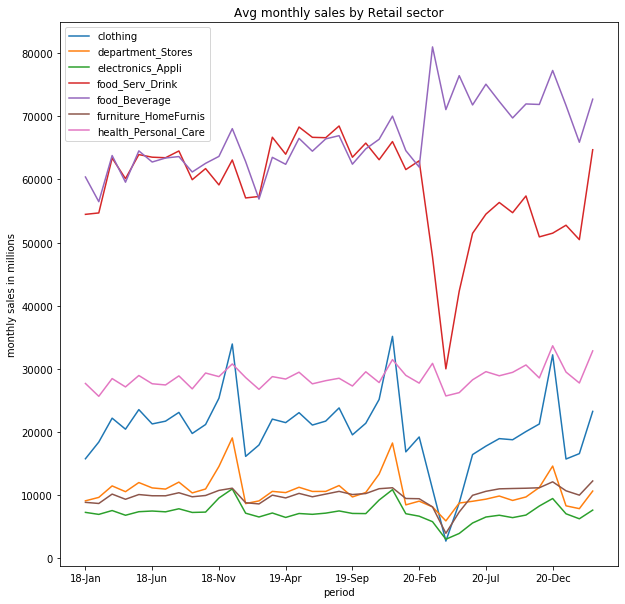

In [462]:
retail_combined_df.plot(kind="line", title="Avg monthly sales department_Stores",figsize=(10,10))
plt.title("Avg monthly sales by Retail sector")
plt.xlabel("period")
plt.ylabel("monthly sales in millions")
plt.savefig('Matplotlib_save_plot.png')

In [ ]:
plt.savefig('Matplotlib_save_plot.png')

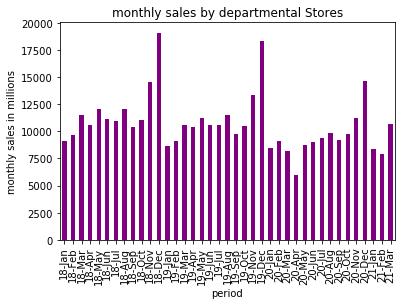

In [452]:
#department_Stores = retail_combined_df['department_Stores']
#department_Stores.head()
#department_Stores.hvplot.line(rot=90)
retail_combined_df['department_Stores'].plot(kind="bar", title="Avg monthly sales department_Stores", color="purple", )
plt.title("monthly sales by departmental Stores")
plt.xlabel("period")
plt.ylabel("monthly sales in millions")
plt.savefig('Matplotlib_save_plot.png')

In [453]:
retail_combined_df.std()

clothing                5874.087445
department_Stores       2538.141070
electronics_Appli       1460.944189
food_Serv_Drink         7834.479469
food_Beverage           5598.277202
furniture_HomeFurnis    1401.226902
health_Personal_Care    1702.054974
dtype: float64

In [397]:
retail_combined_df.describe()

,clothing,department_Stores,electronics_Appli,food_Serv_Drink,food_Beverage,furniture_HomeFurnis,health_Personal_Care
count,39.000000,39.00000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,20395.512821,10695.25641,7236.153846,58846.333333,66642.948718,9952.897436,28697.153846
std,5874.087445,2538.14107,1460.944189,7834.479469,5598.277202,1401.226902,1702.054974
min,2744.000000,5941.00000,3040.000000,30017.000000,56483.000000,3977.000000,25667.000000
25%,17870.000000,9114.00000,6761.000000,54606.500000,62797.000000,9534.500000,27677.000000
50%,21116.000000,10441.00000,7123.000000,61567.000000,64849.000000,10114.000000,28575.000000
75%,22643.000000,11251.00000,7511.500000,63970.000000,71395.000000,10738.500000,29474.500000
max,35157.000000,19082.00000,11004.000000,68469.000000,80990.000000,12263.000000,33670.000000


In [284]:
correlation = retail_combined_df.corr()
correlation

,clothing,department_Stores,electronics_Appli,food_Serv_Drink,food_Beverage,furniture_HomeFurnis,health_Personal_Care
clothing,1.000000,0.911855,0.923523,0.685031,-0.112444,0.777549,0.556032
department_Stores,0.911855,1.000000,0.895749,0.478988,0.001426,0.567544,0.471753
electronics_Appli,0.923523,0.895749,1.000000,0.572507,-0.114837,0.725932,0.522094
food_Serv_Drink,0.685031,0.478988,0.572507,1.000000,-0.461221,0.598422,0.214908
food_Beverage,-0.112444,0.001426,-0.114837,-0.461221,1.000000,0.127640,0.555788
furniture_HomeFurnis,0.777549,0.567544,0.725932,0.598422,0.127640,1.000000,0.657940
health_Personal_Care,0.556032,0.471753,0.522094,0.214908,0.555788,0.657940,1.000000


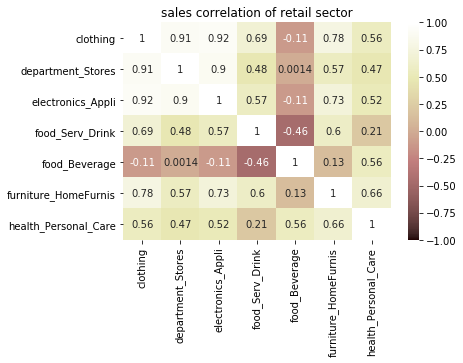

In [495]:
ax = plt.axes()
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap="pink")
ax.set_title('sales correlation of retail sector')
plt.savefig('Matplotlib_save_plot.png')

In [319]:
Pre_pamdemic_df =retail_combined_df.reset_index()
Pre_pamdemic_df.head()

,Period,clothing,department_Stores,electronics_Appli,food_Serv_Drink,food_Beverage,furniture_HomeFurnis,health_Personal_Care
0,18-Jan,15780.0,9120.0,7290.0,54478.0,60393.0,8878.0,27699.0
1,18-Feb,18424.0,9663.0,6972.0,54702.0,56483.0,8701.0,25667.0
2,18-Mar,22207.0,11481.0,7581.0,63389.0,63791.0,10185.0,28477.0
3,18-Apr,20463.0,10567.0,6835.0,60128.0,59571.0,9365.0,27155.0
4,18-May,23560.0,12014.0,7397.0,63941.0,64527.0,10114.0,28960.0


In [321]:
Pre_pamdemic_df['Period2'] = Pre_pamdemic_df['Period'].apply(lambda x: pd.to_datetime(x, format = "%y-%b"))
Pre_pamdemic_df['Period2'].head()

0   2018-01-01
1   2018-02-01
2   2018-03-01
3   2018-04-01
4   2018-05-01
Name: Period2, dtype: datetime64[ns]

In [322]:
Pre_pamdemic_df.dropna(inplace=True)

In [323]:
Pre_pamdemic_df = Pre_pamdemic_df.drop(axis=1,columns='Period').rename(columns={'Period2':'Period'})
Pre_pamdemic_df = Pre_pamdemic_df[['Period', 'clothing','department_Stores', 'electronics_Appli', 'food_Serv_Drink', 'food_Beverage','furniture_HomeFurnis', 'health_Personal_Care']]
Pre_pamdemic_df.head()

,Period,clothing,department_Stores,electronics_Appli,food_Serv_Drink,food_Beverage,furniture_HomeFurnis,health_Personal_Care
0,2018-01-01,15780.0,9120.0,7290.0,54478.0,60393.0,8878.0,27699.0
1,2018-02-01,18424.0,9663.0,6972.0,54702.0,56483.0,8701.0,25667.0
2,2018-03-01,22207.0,11481.0,7581.0,63389.0,63791.0,10185.0,28477.0
3,2018-04-01,20463.0,10567.0,6835.0,60128.0,59571.0,9365.0,27155.0
4,2018-05-01,23560.0,12014.0,7397.0,63941.0,64527.0,10114.0,28960.0


In [327]:
Pre_pamdemic_df.set_index('Period', inplace=True)

In [328]:
pre_pandemic_data_df = Pre_pamdemic_df.loc["2018-01-01":"2020-02-01"]
pre_pandemic_data_df.head()

,clothing,department_Stores,electronics_Appli,food_Serv_Drink,food_Beverage,furniture_HomeFurnis,health_Personal_Care
Period,,,,,,,
2018-01-01,15780.0,9120.0,7290.0,54478.0,60393.0,8878.0,27699.0
2018-02-01,18424.0,9663.0,6972.0,54702.0,56483.0,8701.0,25667.0
2018-03-01,22207.0,11481.0,7581.0,63389.0,63791.0,10185.0,28477.0
2018-04-01,20463.0,10567.0,6835.0,60128.0,59571.0,9365.0,27155.0
2018-05-01,23560.0,12014.0,7397.0,63941.0,64527.0,10114.0,28960.0


In [399]:
Avg_pre_pandemic_data_df = pre_pandemic_data_df.mean()
Avg_pre_pandemic_data_df

clothing                21989.269231
department_Stores       11318.769231
electronics_Appli        7627.076923
food_Serv_Drink         62696.384615
food_Beverage           63468.307692
furniture_HomeFurnis     9944.346154
health_Personal_Care    28349.115385
dtype: float64

In [501]:
Avg_pre_pandemic_data_df.hvplot.line(ylabel="Avg monthly sale in millions", title='AVG MONTHLY SALES PRE PANDEMIC',rot=90)


:Curve   [index]   (0)

In [338]:
Pre_pandemic_corr = pre_pandemic_data_df.corr()
Pre_pandemic_corr

,clothing,department_Stores,electronics_Appli,food_Serv_Drink,food_Beverage,furniture_HomeFurnis,health_Personal_Care
clothing,1.000000,0.972644,0.874440,0.468467,0.724557,0.845014,0.706779
department_Stores,0.972644,1.000000,0.944645,0.287911,0.650655,0.799441,0.672125
electronics_Appli,0.874440,0.944645,1.000000,0.111158,0.620137,0.743080,0.630656
food_Serv_Drink,0.468467,0.287911,0.111158,1.000000,0.737509,0.663950,0.487534
food_Beverage,0.724557,0.650655,0.620137,0.737509,1.000000,0.846277,0.806721
furniture_HomeFurnis,0.845014,0.799441,0.743080,0.663950,0.846277,1.000000,0.665022
health_Personal_Care,0.706779,0.672125,0.630656,0.487534,0.806721,0.665022,1.000000


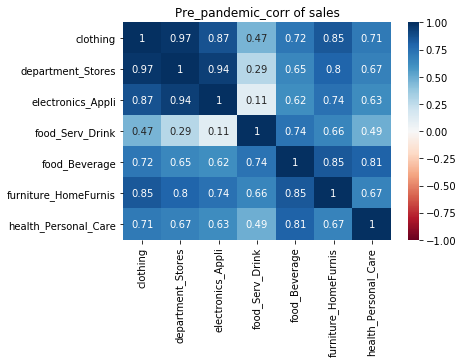

In [496]:
ax = plt.axes()
sns.heatmap(Pre_pandemic_corr, vmin=-1, vmax=1, annot=True, cmap="RdBu")
ax.set_title('Pre_pandemic_corr of sales')
plt.savefig('Matplotlib_save_plot.png')


In [331]:
post_pandemic_data_df = Pre_pamdemic_df.loc["2020-03-01":"2021-03-01"]
post_pandemic_data_df.head()

,clothing,department_Stores,electronics_Appli,food_Serv_Drink,food_Beverage,furniture_HomeFurnis,health_Personal_Care
Period,,,,,,,
2020-03-01,10969.0,8158.0,5816.0,47740.0,80990.0,8159.0,30888.0
2020-04-01,2744.0,5941.0,3040.0,30017.0,71064.0,3977.0,25724.0
2020-05-01,8787.0,8768.0,3952.0,42321.0,76438.0,7349.0,26251.0
2020-06-01,16442.0,9047.0,5608.0,51473.0,71799.0,9993.0,28279.0
2020-07-01,17779.0,9384.0,6555.0,54511.0,75085.0,10625.0,29573.0


In [403]:
Avg_post_pandemic_data_df = post_pandemic_data_df.mean()
Avg_post_pandemic_data_df

clothing                17208.000000
department_Stores        9448.230769
electronics_Appli        6454.307692
food_Serv_Drink         51146.230769
food_Beverage           72992.230769
furniture_HomeFurnis     9970.000000
health_Personal_Care    29393.230769
dtype: float64

In [405]:
Post_pandemic_corr = pre_pandemic_data_df.corr()
Post_pandemic_corr

,clothing,department_Stores,electronics_Appli,food_Serv_Drink,food_Beverage,furniture_HomeFurnis,health_Personal_Care
clothing,1.000000,0.972644,0.874440,0.468467,0.724557,0.845014,0.706779
department_Stores,0.972644,1.000000,0.944645,0.287911,0.650655,0.799441,0.672125
electronics_Appli,0.874440,0.944645,1.000000,0.111158,0.620137,0.743080,0.630656
food_Serv_Drink,0.468467,0.287911,0.111158,1.000000,0.737509,0.663950,0.487534
food_Beverage,0.724557,0.650655,0.620137,0.737509,1.000000,0.846277,0.806721
furniture_HomeFurnis,0.845014,0.799441,0.743080,0.663950,0.846277,1.000000,0.665022
health_Personal_Care,0.706779,0.672125,0.630656,0.487534,0.806721,0.665022,1.000000


In [500]:
Avg_post_pandemic_data_df.hvplot.line(ylabel="Avg monthly sale in millions", title='AVG MONTHLY SALES POST PANDEMIC',rot=90)


:Curve   [index]   (0)

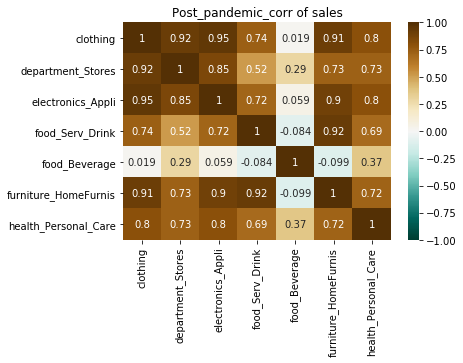

In [497]:
ax = plt.axes()
sns.heatmap(post_pandemic_corr, vmin=-1, vmax=1, annot=True, cmap="BrBG_r")
ax.set_title('Post_pandemic_corr of sales')
plt.savefig('Matplotlib_save_plot.png')